In [14]:
# STANDARD LIBRARIES
import pandas as pd
import numpy as np
import glob
import pickle
import datetime 

import matplotlib.pyplot as plt
import seaborn as sns

# Read Dataframes

In [38]:
data = pd.read_csv("../data/fy19fullpropassess.csv", low_memory=False)
pw_df = pd.read_csv("../data/public-works-violations/tmpcmn0p2r0.csv", low_memory=False)
requests_df = pd.read_csv("../data/311-requests/311_service_requests_2019.csv", low_memory=False)

# FIRE DATA IS ACROSS SEVERAL CSVs
path = r"../data/fire-incident-reporting/"
files = glob.glob(path + "/*.csv")

data_list = []

for file in files:
    df = pd.read_csv(file, index_col=None, header=0)
    data_list.append(df)
    
fire_df = pd.concat(data_list, axis=0, ignore_index=True)
# https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe

In [3]:
data = pd.read_csv("../data/clean-data/data-clean.csv", low_memory=False)
pw_df = pd.read_csv("../data/clean-data/pw_df-clean.csv", low_memory=False)
fire_df = pd.read_csv("../data/clean-data/fire_df-clean.csv")
# requests_df = pd.read_csv("../data/clean-data/requests_df-clean.csv", low_memory=False)

df_list = [
    data,
    pw_df,
#     requests_df,
    fire_df
]

for df in df_list:
    try:
        df.drop(columns="Unnamed: 0", inplace=True)
    except KeyError:
        pass

# Check Data

In [15]:
print("Data nan: %d" % (data.isna().sum().sum()))
print("PW nan: %d" % (pw_df.isna().sum().sum()))
print("Fire nan: %d" % (fire_df.isna().sum().sum()))
print("Requests nan: %d" % (requests_df.isna().sum().sum()))

data.isna().sum().sum() + pw_df.isna().sum().sum() + fire_df.isna().sum().sum() + requests_df.isna().sum().sum()

Data nan: 6319147
PW nan: 362912
Fire nan: 4334
Requests nan: 488800


7175193

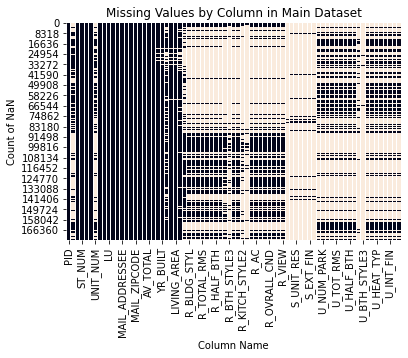

In [26]:
sns.heatmap(data.isna(), cbar=False)
plt.title("Missing Values by Column in Main Dataset")
plt.ylabel("Count of NaN")
plt.xlabel("Column Name")
plt.savefig("../assets/images/data-nan-heatmap")

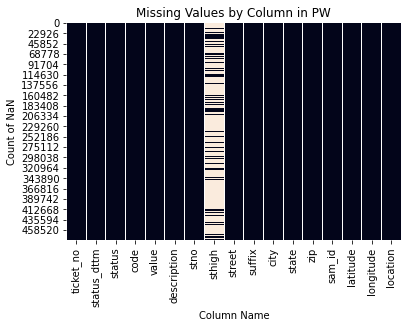

In [25]:
sns.heatmap(pw_df.isna(), cbar=False)
plt.title("Missing Values by Column in PW")
plt.ylabel("Count of NaN")
plt.xlabel("Column Name")
plt.savefig("../assets/images/pw_df-nan-heatmap")

## Data

In [12]:
[col for col in data.columns if "OWN" in col]

['OWN_OCC', 'OWNER']

In [13]:
data["OWNER"]

0                MANIACE H RICHARD JR
1                MANIACE H RICHARD JR
2                   GERRISH MERRILY S
3               MANIACE H RICHARD JR 
4                        BARRY JOHN P
                     ...             
174663    EAGLE PROPERTY HOLDINGS LLC
174664         GREALISH MARTIN J TRST
174665               COMMWLTH OF MASS
174666               COMMWLTH OF MASS
174667               COMMWLTH OF MASS
Name: OWNER, Length: 174668, dtype: object

In [14]:
data.columns

Index(['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'ST_NAME', 'ST_NAME_SUF',
       'UNIT_NUM', 'ZIPCODE', 'PTYPE', 'LU', 'OWN_OCC', 'OWNER',
       'MAIL_ADDRESSEE', 'MAIL_ADDRESS', 'MAIL CS', 'MAIL_ZIPCODE', 'AV_LAND',
       'AV_BLDG', 'AV_TOTAL', 'GROSS_TAX', 'LAND_SF', 'YR_BUILT', 'YR_REMOD',
       'GROSS_AREA', 'LIVING_AREA', 'NUM_FLOORS', 'STRUCTURE_CLASS',
       'R_BLDG_STYL', 'R_ROOF_TYP', 'R_EXT_FIN', 'R_TOTAL_RMS', 'R_BDRMS',
       'R_FULL_BTH', 'R_HALF_BTH', 'R_BTH_STYLE', 'R_BTH_STYLE2',
       'R_BTH_STYLE3', 'R_KITCH', 'R_KITCH_STYLE', 'R_KITCH_STYLE2',
       'R_KITCH_STYLE3', 'R_HEAT_TYP', 'R_AC', 'R_FPLACE', 'R_EXT_CND',
       'R_OVRALL_CND', 'R_INT_CND', 'R_INT_FIN', 'R_VIEW', 'S_NUM_BLDG',
       'S_BLDG_STYL', 'S_UNIT_RES', 'S_UNIT_COM', 'S_UNIT_RC', 'S_EXT_FIN',
       'S_EXT_CND', 'U_BASE_FLOOR', 'U_NUM_PARK', 'U_CORNER', 'U_ORIENT',
       'U_TOT_RMS', 'U_BDRMS', 'U_FULL_BTH', 'U_HALF_BTH', 'U_BTH_STYLE',
       'U_BTH_STYLE2', 'U_BTH_STYLE3', 'U_KITCH_TYPE', 'U_KIT

In [561]:
print(data.shape)
data.head()

(174668, 75)


,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,502550008,502550000.0,502550000,87,BEACON,ST,2-F,2108.0,102,CD,...,M,NaN,O,M,W,N,1.0,N,G,A
1,502550010,502550000.0,502550000,87,BEACON,ST,2-R,2108.0,102,CD,...,NaN,NaN,O,S,W,N,1.0,N,A,A
2,502550012,502550000.0,502550000,87,BEACON,ST,3-F,2108.0,102,CD,...,S,NaN,O,M,W,N,1.0,N,A,G
3,502550014,502550000.0,502550000,87,BEACON,ST,3-R,2108.0,102,CD,...,NaN,NaN,O,N,W,N,1.0,S,A,G
4,502550016,502550000.0,502550000,87,BEACON,ST,4,2108.0,102,CD,...,M,M,O,L,W,C,2.0,N,E,G


In [562]:
# THIS IS THE COLUMN TO ASSIGN TO OTHER DF ADDRESSES AND JOIN ON
data.drop_duplicates(subset=["GIS_ID"])

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,502550008,502550000.0,502550000,87,BEACON,ST,2-F,2108.0,102,CD,...,M,NaN,O,M,W,N,1.0,N,G,A
5,502551000,502551000.0,502551000,88,BEACON,ST,NaN,2108.0,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12,502552000,NaN,502552000,89,BEACON,ST,NaN,2108.0,112,A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,502553000,502553000.0,502553000,90,BEACON,ST,NaN,2108.0,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,502554000,502554000.0,502554000,91,BEACON,ST,NaN,2108.0,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174661,2205666000,NaN,2205666000,,KNOWLES,ST,NaN,2135.0,902,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174662,2205667000,NaN,2205667000,,LAKE,ST,NaN,2135.0,132,RL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174663,2205668000,NaN,2205668000,4,LAKE,ST,NaN,2135.0,105,R3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
174664,2205669000,NaN,2205669000,2193 2201,COMMONWEALTH,AV,NaN,2135.0,319,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [563]:
data.loc[data["GIS_ID"] == 502550000]

,PID,CM_ID,GIS_ID,ST_NUM,ST_NAME,ST_NAME_SUF,UNIT_NUM,ZIPCODE,PTYPE,LU,...,U_BTH_STYLE2,U_BTH_STYLE3,U_KITCH_TYPE,U_KITCH_STYLE,U_HEAT_TYP,U_AC,U_FPLACE,U_INT_FIN,U_INT_CND,U_VIEW
0,502550008,502550000.0,502550000,87,BEACON,ST,2-F,2108.0,102,CD,...,M,NaN,O,M,W,N,1.0,N,G,A
1,502550010,502550000.0,502550000,87,BEACON,ST,2-R,2108.0,102,CD,...,NaN,NaN,O,S,W,N,1.0,N,A,A
2,502550012,502550000.0,502550000,87,BEACON,ST,3-F,2108.0,102,CD,...,S,NaN,O,M,W,N,1.0,N,A,G
3,502550014,502550000.0,502550000,87,BEACON,ST,3-R,2108.0,102,CD,...,NaN,NaN,O,N,W,N,1.0,S,A,G
4,502550016,502550000.0,502550000,87,BEACON,ST,4,2108.0,102,CD,...,M,M,O,L,W,C,2.0,N,E,G
45818,502550000,502550000.0,502550000,87,BEACON,ST,NaN,2108.0,995,CM,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45819,502550002,502550000.0,502550000,87,BEACON,ST,G-1,2108.0,102,CD,...,M,NaN,O,M,W,N,0.0,N,G,A
45820,502550004,502550000.0,502550000,87,BEACON,ST,1,2108.0,102,CD,...,S,NaN,O,M,W,C,1.0,N,G,A


In [564]:
data.dtypes

PID            int64
CM_ID        float64
GIS_ID         int64
ST_NUM        object
ST_NAME       object
              ...   
U_AC          object
U_FPLACE     float64
U_INT_FIN     object
U_INT_CND     object
U_VIEW        object
Length: 75, dtype: object

In [565]:
data.isna().sum()

PID               0
CM_ID         92630
GIS_ID            0
ST_NUM            0
ST_NAME           0
              ...  
U_AC         110624
U_FPLACE     110624
U_INT_FIN    110624
U_INT_CND    110624
U_VIEW       110624
Length: 75, dtype: int64

## PW

In [6]:
pw_df["description"].unique()

array(['Improper storage trash: res', 'Overfilling of barrel/dumpster',
       'Illegal dumping < 1 cubic yd', 'Overgrown Weeds On Property',
       'Improper storage trash: com', 'Trash illegally dump container',
       'Occupying City prop wo permit', 'illegal parking prop owner 1',
       'Failure To Register', 'Maint a dumpster wopermit',
       'Unregistered motor vehicles-1', 'illegal parking prop owner 2',
       'Unregistered motor vehicles- 2', 'Non-Emergency Auto Repair',
       'Shopping Cart - 1', 'Illegal dumping 1-5 cubic yd.:',
       'Site Cleanliness license – WAR', 'Site Cleanliness license – VIO',
       'No Number On A Building', 'Shopping Cart - 2',
       'Failure to Obtain Inspection', 'Graffiti on building- 1',
       'Failed Multiple Rental Insp', 'disposal med waste',
       'Posting signs wo authority', 'Failure clear sidewalk - snow',
       'Transporting refuse without pe', 'Failure clear sidewalk - snow:',
       'Removal snow private prop', 'Fail to post 

In [11]:
print(pw_df.shape)
pw_df.head()

(481429, 17)


,ticket_no,status_dttm,status,code,value,description,stno,sthigh,street,suffix,city,state,zip,sam_id,latitude,longitude,location
0,CE494577,2020-05-26 07:29:00,Open,1,25,Improper storage trash: res,118,NaN,Commonwealth,AVE,Boston,MA,02116,37097,42.351830,-71.076720,"(42.3518299997315, -71.0767200009251)"
1,CE494575,2020-05-26 07:26:00,Open,1,25,Improper storage trash: res,1037,,River,ST,Hyde Park,MA,02136,344142,42.259883,-71.117176,"(42.2598833641543, -71.1171758487242)"
2,CE494575,2020-05-26 07:26:00,Open,3,100,Overfilling of barrel/dumpster,1037,,River,ST,Hyde Park,MA,02136,344142,42.259883,-71.117176,"(42.2598833641543, -71.1171758487242)"
3,CE494576,2020-05-26 07:25:00,Open,3,100,Overfilling of barrel/dumpster,110,NaN,Warren,ST,Allston,MA,02135,143122,42.349353,-71.141434,"(42.3493529997196, -71.1414340008673)"
4,CE494576,2020-05-26 07:25:00,Open,1,25,Improper storage trash: res,110,NaN,Warren,ST,Allston,MA,02135,143122,42.349353,-71.141434,"(42.3493529997196, -71.1414340008673)"


In [29]:
pw_df.columns

Index(['ticket_no', 'status_dttm', 'status', 'code', 'value', 'description',
       'stno', 'sthigh', 'street', 'suffix', 'city', 'state', 'zip', 'sam_id',
       'latitude', 'longitude', 'location'],
      dtype='object')

In [12]:
pw_df.isna().sum()

ticket_no           0
status_dttm         0
status              0
code                0
value               0
description         0
stno                0
sthigh         360099
street              0
suffix           2680
city                1
state               0
zip               132
sam_id              0
latitude            0
longitude           0
location            0
dtype: int64

In [568]:
# pw_df.loc[(pw_df["zip"].isna()) & (pw_df["street"] == "Raldne")] # 72
# pw_df.loc[(pw_df["zip"].isna()) & (pw_df["street"] == "Silvia")] # 16
# pw_df.loc[(pw_df["zip"].isna()) & (pw_df["street"].())] # 16
pw_df.groupby("street")["zip"].value_counts()

KeyError: 'street'

In [ ]:
pw_df.dtypes

## Fire 

In [16]:
print(fire_df.shape)
fire_df.head()

(49555, 24)


,Incident Number,Exposure Number,Alarm Date,Alarm Time,Incident Type,Incident Description,Estimated Property Loss,Estimated Content Loss,District,City Section,...,Street Number,Street Prefix,Street Name,Street Suffix,Street Type,Address 2,XStreet Prefix,XStreet Name,XStreet Suffix,XStreet Type
0,19-0019301,0,04/01/2019,00:38:31,736,CO detector activation due to malfunction ...,0.0,0.0,09,RX,...,800,,PARKER,,ST,,,,,
1,19-0019302,0,04/01/2019,00:52:06,553,Public service ...,0.0,0.0,09,RX,...,39,,ROXBURY,,ST,:3,,,,
2,19-0019303,0,04/01/2019,00:54:27,735,Alarm system sounded due to malfunction ...,0.0,0.0,09,RX,...,131,,WALNUT,,AVE,: #12-2159,,,,
3,19-0019304,0,04/01/2019,00:59:02,714,"Central station, malicious false alarm ...",0.0,0.0,04,BO,...,90,,GAINSBOROUGH,,ST,,,,,
4,19-0019305,0,04/01/2019,01:20:08,700,"False alarm or false call, Other ...",0.0,0.0,04,BO,...,95,,GAINSBOROUGH,,ST,,,,,


In [19]:
fire_df.columns

Index(['Incident Number', 'Exposure Number', 'Alarm Date', 'Alarm Time',
       'Incident Type', 'Incident Description', 'Estimated Property Loss',
       'Estimated Content Loss', 'District', 'City Section', 'Neighborhood',
       'Zip', 'Property Use', 'Property Description', 'Street Number',
       'Street Prefix', 'Street Name', 'Street Suffix', 'Street Type',
       'Address 2', 'XStreet Prefix', 'XStreet Name', 'XStreet Suffix',
       'XStreet Type'],
      dtype='object')

In [17]:
fire_df.dtypes

Incident Number             object
Exposure Number              int64
Alarm Date                  object
Alarm Time                  object
Incident Type               object
Incident Description        object
Estimated Property Loss    float64
Estimated Content Loss     float64
District                    object
City Section                object
Neighborhood                object
Zip                          int64
Property Use                object
Property Description        object
Street Number               object
Street Prefix               object
Street Name                 object
Street Suffix               object
Street Type                 object
Address 2                   object
XStreet Prefix              object
XStreet Name                object
XStreet Suffix              object
XStreet Type                object
dtype: object

In [11]:
fire_df.isna().sum()

Incident Number               0
Exposure Number               0
Alarm Date                    0
Alarm Time                    0
Incident Type                 0
Incident Description          0
Estimated Property Loss       0
Estimated Content Loss        0
District                      0
City Section                  0
Neighborhood                694
Zip                           0
Property Use                  0
Property Description       3640
Street Number                 0
Street Prefix                 0
Street Name                   0
Street Suffix                 0
Street Type                   0
Address 2                     0
XStreet Prefix                0
XStreet Name                  0
XStreet Suffix                0
XStreet Type                  0
had_incident                  0
dtype: int64

In [ ]:
fire_df["Estimated Content Loss"].value_counts()

In [ ]:
fire_df["City Section"].value_counts()

In [ ]:
fire_df["Zip"].value_counts()

## 311 Requests

In [8]:
requests_df["reason"].unique()

array(['Enforcement & Abandoned Vehicles', 'Catchbasin', 'Notification',
       'Street Cleaning', 'Street Lights', 'Fire Hydrant',
       'Code Enforcement', 'Highway Maintenance', 'Trees',
       'Needle Program', 'Graffiti', 'Abandoned Bicycle', 'Animal Issues',
       'Building', 'Signs & Signals', 'Sanitation',
       'Park Maintenance & Safety', 'Housing', 'Sidewalk Cover / Manhole',
       'Recycling', 'Environmental Services', 'Health', 'Operations',
       'Administrative & General Requests', 'Employee & General Comments',
       'Weights and Measures', 'Boston Bikes',
       'Traffic Management & Engineering', 'Noise Disturbance',
       'Neighborhood Services Issues', 'Pothole', 'Air Pollution Control',
       'Programs', 'Alert Boston', 'Massport', 'Cemetery',
       'Parking Complaints', 'Consumer Affairs Issues',
       'Generic Noise Disturbance', 'Office of The Parking Clerk',
       'Bridge Maintenance', 'Valet', 'Billing', 'General Request'],
      dtype=object)

In [12]:
print(requests_df.shape)
requests_df.head()

(259496, 29)


,case_enquiry_id,open_dt,target_dt,closed_dt,ontime,case_status,closure_reason,case_title,subject,reason,...,police_district,neighborhood,neighborhood_services_district,ward,precinct,location_street_name,location_zipcode,latitude,longitude,source
0,101002767856,2019-01-01 00:04:32,2019-01-03 08:30:00,2019-01-02 02:22:29,ONTIME,Closed,Case Closed. Closed date : 2019-01-02 02:22:29...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,B3,Dorchester,9,Ward 17,1701,6-8 School St,2124.0,42.2965,-71.0729,Citizens Connect App
1,101002767857,2019-01-01 00:08:52,2019-01-03 08:30:00,2019-01-02 02:22:11,ONTIME,Closed,Case Closed. Closed date : 2019-01-02 02:22:11...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,D14,Allston / Brighton,15,22,2209,INTERSECTION Eastburn St & Mount Vernon St,NaN,42.3594,-71.0587,Citizens Connect App
2,101002767859,2019-01-01 00:50:00,NaN,2019-11-23 11:36:05,ONTIME,Closed,Case Closed. Closed date : 2019-11-23 11:36:05...,Catchbasin,Boston Water & Sewer Commission,Catchbasin,...,E13,Jamaica Plain,11,11,1110,195 South St,2130.0,42.3594,-71.0587,Constituent Call
3,101002767861,2019-01-01 01:26:00,NaN,2019-05-17 12:27:07,ONTIME,Closed,Case Closed. Closed date : 2019-05-17 12:27:07...,Fire,Mayor's 24 Hour Hotline,Notification,...,C11,Dorchester,8,Ward 15,1507,34 Ridgewood St,2122.0,42.3022,-71.0661,Constituent Call
4,101002767862,2019-01-01 01:33:09,2019-01-03 08:30:00,2019-01-02 02:28:35,ONTIME,Closed,Case Closed. Closed date : 2019-01-02 02:28:35...,Parking Enforcement,Transportation - Traffic Division,Enforcement & Abandoned Vehicles,...,B3,Dorchester,9,Ward 17,1701,3 School St,2124.0,42.2968,-71.0727,Citizens Connect App


In [27]:
requests_df.isna().sum()

case_enquiry_id                        0
open_dt                                0
target_dt                          34763
closed_dt                          34687
ontime                                 1
case_status                            0
closure_reason                         0
case_title                             1
subject                                0
reason                                 0
type                                   0
queue                                  0
department                             0
submittedphoto                    154335
closedphoto                       199831
location                               0
fire_district                        608
pwd_district                         104
city_council_district                 22
police_district                       97
neighborhood                         311
neighborhood_services_district        23
ward                                   2
precinct                             155
location_street_

In [30]:
requests_df["location"]

0                      6-8 School St  Dorchester  MA  02124
1         INTERSECTION of Eastburn St & Mount Vernon St ...
2                    195 South St  Jamaica Plain  MA  02130
3                    34 Ridgewood St  Dorchester  MA  02122
4                        3 School St  Dorchester  MA  02124
                                ...                        
259491                  2 Newcroft Cir  Mattapan  MA  02126
259492              638 Saratoga St  East Boston  MA  02128
259493                 5-7 Lawrence Pl  Brighton  MA  02135
259494               305 Chelsea St  East Boston  MA  02128
259495               40 Forbes St  Jamaica Plain  MA  02130
Name: location, Length: 259496, dtype: object

In [25]:
requests_df.dtypes

case_enquiry_id                     int64
open_dt                            object
target_dt                          object
closed_dt                          object
ontime                             object
case_status                        object
closure_reason                     object
case_title                         object
subject                            object
reason                             object
type                               object
queue                              object
department                         object
submittedphoto                     object
closedphoto                        object
location                           object
fire_district                      object
pwd_district                       object
city_council_district              object
police_district                    object
neighborhood                       object
neighborhood_services_district     object
ward                               object
precinct                          

In [26]:
requests_df.columns

Index(['case_enquiry_id', 'open_dt', 'target_dt', 'closed_dt', 'ontime',
       'case_status', 'closure_reason', 'case_title', 'subject', 'reason',
       'type', 'queue', 'department', 'submittedphoto', 'closedphoto',
       'location', 'fire_district', 'pwd_district', 'city_council_district',
       'police_district', 'neighborhood', 'neighborhood_services_district',
       'ward', 'precinct', 'location_street_name', 'location_zipcode',
       'latitude', 'longitude', 'source'],
      dtype='object')

In [ ]:
requests_df["source"].value_counts()

In [ ]:
requests_df["ontime"].value_counts()

In [ ]:
requests_df["case_status"].value_counts()

In [ ]:
requests_df["subject"].value_counts()

In [ ]:
requests_df["reason"].value_counts()

In [ ]:
requests_df.dtypes

In [ ]:
requests_df["location"].str.contains("021").sum()

In [ ]:
requests_df['zipcode'] = requests_df['location'].str.extract(r'(\d{5}\-?\d{0,4})')


In [ ]:
requests_df["zipcode"].isna().sum()

# Master Clean Function

- The cell below contains the original functions to be called in the `clean_dataframe` function

In [31]:
# CONVERT ALL ALPHABETICAL TO LOWERCASE
def to_lowercase(df):
    
    # COLS TO LOWERCASE
    df.columns = map(str.lower, df.columns)
    
    # ROWS TO LOWERCASE
    object_columns = df.select_dtypes(include="object").columns
    for col in object_columns:
        df[col] = df[col].str.lower()
        
    print("All alphabetical charactars have been made lowercase")
    return df 



def assign_null(df):
    
    init_check = input("Would you like to fill NaN? Enter 'yes' or 'no': ")
    
    while init_check.lower() == "yes":
        col = input("Enter a column to assign null value: ")
        value = input("Enter value to impute null (press 'space' once for blank) : ")
        df[col].fillna(value, inplace=True)
        init_check = input("Would you like to fill NaN? Enter 'yes' or 'no': ")
    return df



def change_dtype(df):
    
    init_check = input("Do you need to change a column datatype?"\
                       " Enter yes or no: ")
    
    while init_check == "yes":
        col = input("Enter column name to change datatype: ")
        dtype = eval(input("Enter datatype to convert the column to: "))
        
        if dtype == "int":
            try:
                df[col] = df[col].astype(dtype)
                print(f"Updated {col} to int")
            except ValueError:
                print("Invalid dtype.....")
                init_check = input("Would you like to try again?"\
                                   " Enter yes or no: ")
        elif dtype == "float":
            try:
                df[col] = df[col].astype(dtype)
                print(f"Updated {col} to float")
            except ValueError:
                print("Invalid dtype.....")
                init_check = input("Would you like to try again?"\
                                   " Enter yes or no: ")
        elif dtype == "str":
            try:
                df[col] = df[col].astype(dtype)
                print(f"Updated {col} to str")
            except ValueError:
                print("Invalid dtype.....")
                init_check = input("Would you like to try again?"\
                                   " Enter yes or no: ")
        elif dtype == "bool":
            try:
                df[col] = cdf[col].astype(dtype)
                print(f"Updated {col} to Boolean")
            except ValueError:
                print("Invalid dtype.....")
                init_check = input("Would you like to try again?"\
                                   " Enter yes or no: ")
        else:
            df[col] = pd.to_datetime(df[col], infer_datetime_format=True)
            print(f"Updated {col} to Datetime")
            init_check = input("Would you like to change another column?"\
                                " Enter yes or no: ")
    return df

def get_df_name(df):
    name = [x for x in globals() if globals()[x] is df][0]
    return name
#     # https://stackoverflow.com/questions/41684553/print-dataframe-name

def clean_dataframe(df):
    
    to_lowercase(df)
    assign_null(df)
    change_dtype(df)
    
    name = get_df_name(df) # NOT WORKING
    
    print(f"Finished Cleaning DataFrame: {name}")
    print()
    print()
#     df.to_csv("../data/clean-data/%s.csv" % (name))
    
    return df

**Notes on Cleaning**

- **NaN:**
    - Unit Numbers
        - List of dataframes:
            - `data[unit_num]`
                - Not all properties have a unit number attached to it.
                - `108968` are missing unit numbers

# Call Clean Funtion

In [ ]:
# INSTRUCTIONS:

# 1: FOR DATA - 
#     IMPUTE "st_name_suf" with " "
# 2: PW:
#     NO IMPUTE
#     CHANGE status_dttm TO DATETIME
# 3: CRIME:
#     NO IMPUTE
# 4: FIRE
#     NO IMPUTE
#     NO DTYPE CHANGE
# 5: REQUESTS
#     NO IMPUTE
#     NO DTYPE CHANGES - MAYBE open_dt AND closed_dt

In [32]:
clean_dataframe(data);
# clean_dataframe(pw_df);
# clean_dataframe(fire_df);
# clean_dataframe(requests_df);

All alphabetical charactars have been made lowercase
Would you like to fill NaN? Enter 'yes' or 'no': yes
Enter a column to assign null value: st_name_suf
Enter value to impute null (press 'space' once for blank) :  
Would you like to fill NaN? Enter 'yes' or 'no': no
Do you need to change a column datatype? Enter yes or no: no
Finished Cleaning DataFrame: data




# Columns 

## Data

### old

NaN of Note:

- **`data`**
    - `land_sf`
        - Only 5441
        - Via the data dict: "Parcel's land area in sq feet (legal area)"
    - `yr_built`
        - Only 5214 NaN
        - In reality, EVERY building has build year.
            - These NaN could represent historic buildings?
    - `yr_remod` 
        - 41796 NaN
        - Many houses may not ever have been remodeled?
            - Hard to merely `fillna`?
    - `r_ovrall_cond`
        - 111911 NaN
        - Perhaps many residences just aren't rated?
    - `r_int_cnd`
        - 111911 NaN ^^^ Same as above? Very odd
    - `r_int_fin`
        - 111911 NaN ^^^ Same as above? Very odd
    - `r_view`
        - 111911 NaN ^^^ Same as above? Very odd

In [ ]:
data_null_list = data.loc[:, data.isna().any()].columns
pw_df_null_list = pw_df.loc[:, pw_df.isna().any()].columns
crime_df_null_list = crime_df.loc[:, crime_df.isna().any()].columns
requests_df_null_list = requests_df.loc[:, requests_df.isna().any()].columns
str_eligible_df_null_list = str_eligible_df.loc[:, str_eligible_df.isna().any()].columns
fire_df_null_list = fire_df.loc[:, fire_df.isna().any()].columns

null_list = [
    data_null_list,
    pw_df_null_list,
    crime_df_null_list,
    requests_df_null_list,
    str_eligible_df_null_list,
    fire_df_null_list
]

# SAVE THE ABOVE FOR FUTURE REFERENCE
filename = "../assets/variables/null_list1"
outfile = open(filename, "wb")
pickle.dump(null_list, outfile)
outfile.close()

null_list

### Current

In [33]:
data = data[[
#     "gis_id",
    "st_num",
    "st_name",
#     "st_name_suf",
    "zipcode",
    "lu",
    "own_occ",
    "av_land",
    "av_bldg",
    "av_total",
    "gross_tax",
#     "land_sf",
#     "yr_built", # WILL MOST LIKELY BE IMPORTANT, CONTAINS NAN THAT NEED TO BE CHECKED
]]

In [34]:
# DROP ALL CONDO PARKING 
data = data[data["lu"] != "cp"]

# DROP ALL AGRICULTURAL PROPERTIES
# data = data[data["lu"] != "ah"] # NEED TO CHECK THIS BEFORE DROPPING

# DROP ROWS WITHOUT ZIPCODES (REPRESENT 4**-5, OR 0.09% OF THE DATA)
data.dropna(axis=0, how="any", subset=["zipcode"], inplace=True)

In [35]:
# THESE ZIPCODES ARE BOSTON PROPERTY IN DIFFERENT TOWNS/ AREAS
zip_list = [
    2090.0, # WESTWOOD
    2026.0, # DEDHAM
    2137.0, # READVILLE
    2186.0 # MILTON
]

for zipcode in zip_list:
    data = data[data["zipcode"] != zipcode]

# data["zipcode"].value_counts()

In [37]:
data.head()

,st_num,st_name,zipcode,lu,own_occ,av_land,av_bldg,av_total,gross_tax
0,87,beacon,2108.0,cd,y,0,878200,878200,925623
1,87,beacon,2108.0,cd,n,0,817600,817600,861750
2,87,beacon,2108.0,cd,y,0,849500,849500,895373
3,87,beacon,2108.0,cd,n,0,734400,734400,774058
4,87,beacon,2108.0,cd,y,0,2162300,2162300,2279064


## PW

In [32]:
pw_df.rename(columns={"stno": "st_num", 
                      "street": "st_name", 
                      "suffix": "st_name_suf",
                      "zip": "zipcode",
                      "location": "pw_coords"}, 
             inplace=True)

In [33]:
# zipcodes ==============

# LOOK UP ZIPCODES BASED ON QUICK SEARCH:
# ALL OF THESE NAN ADDRESSES ARE IN ZIPCODE 02136

pw_df["zipcode"].fillna(value="02136", inplace=True)

pw_df.loc[pw_df["zipcode"].isna()]

,ticket_no,status_dttm,status,code,value,description,st_num,sthigh,st_name,st_name_suf,city,state,zipcode,sam_id,latitude,longitude,pw_coords


In [34]:
# SET THE DATAFRAME TO ONLY CALENDAR YEAR 2019
pw_df = pw_df.loc[pw_df["status_dttm"].dt.year == 2019]

In [35]:
pw_df.shape

(47598, 17)

In [36]:
pw_df.columns

Index(['ticket_no', 'status_dttm', 'status', 'code', 'value', 'description',
       'st_num', 'sthigh', 'st_name', 'st_name_suf', 'city', 'state',
       'zipcode', 'sam_id', 'latitude', 'longitude', 'pw_coords'],
      dtype='object')

In [37]:
# CREATE A COLUMN OF THE NUMBER OF OCCURENCES
pw_df["pw_violation"] = 1

In [38]:
pw_cols = [
    "st_num",
    "st_name",
#     "st_name_suf",
    "zipcode",
#     "city",
    "status",
    "value",
    "description",
#     "location",
#     "pw_violation",
    "pw_coords",
    "pw_violation"
]

# for col in pw_cols:
#     print(col)
#     print(pw_df[col].value_counts())
#     print()

pw_df = pw_df[pw_cols]

In [39]:
print(pw_df.shape)
print(pw_df.isna().sum().sum())
pw_df

(47598, 8)
0


,st_num,st_name,zipcode,status,value,description,pw_coords,pw_violation
13519,21,concord,02118,closed,25,improper storage trash: res,"(42.3414400001191, -71.0786700008747)",1
13520,196,saint botolph,02115,closed,25,improper storage trash: res,"(42.3424770002421, -71.0833950010045)",1
13521,68,pinckney,02108,open,25,improper storage trash: res,"(42.358730000273, -71.0679200008751)",1
13522,165,friend,02114,open,250,illegal dumping < 1 cubic yd,"(42.3636622564374, -71.0599017627837)",1
13523,263,north,02113,closed,25,improper storage trash: res,"(42.3637800001796, -71.0517900010775)",1
...,...,...,...,...,...,...,...,...
61112,793,sixth,02127,open,50,occupying city prop wo permit,"(42.3331058512593, -71.0285231569049)",1
61113,1744,washington,02118,closed,25,improper storage trash: res,"(42.336510000394, -71.0764500010659)",1
61114,875,beacon,02215,closed,25,improper storage trash: res,"(42.3465299999799, -71.1044400016727)",1
61115,55,saint stephen,02115,closed,25,improper storage trash: res,"(42.3422399999824, -71.0873500011829)",1


## Fire 

In [21]:
fire_df.rename(columns={"street number": "st_num", 
                "street name": "st_name", 
                "street type": "st_name_suf",
                "zip": "zipcode"}, 
               inplace=True)
fire_df["had_incident"] = 1

In [22]:
fire_df.columns

Index(['incident number', 'exposure number', 'alarm date', 'alarm time',
       'incident type', 'incident description', 'estimated property loss',
       'estimated content loss', 'district', 'city section', 'neighborhood',
       'zipcode', 'property use', 'property description', 'st_num',
       'street prefix', 'st_name', 'street suffix', 'st_name_suf', 'address 2',
       'xstreet prefix', 'xstreet name', 'xstreet suffix', 'xstreet type',
       'had_incident'],
      dtype='object')

In [23]:
fire_cols= [
    "st_num",
    "st_name",
#     "st_name_suf",
    "zipcode",
    "estimated property loss",
    "estimated content loss",
    "had_incident"
]

# for col in fire_cols:
#     print(col)
#     print(fire_df[col].value_counts())
#     print()

fire_df = fire_df[fire_cols]

In [24]:
print(fire_df.shape)
print(fire_df.isna().sum().sum())
fire_df.head()

(49555, 6)
0


,st_num,st_name,zipcode,estimated property loss,estimated content loss,had_incident
0,800,parker,2120,0.0,0.0,1
1,39,roxbury,2119,0.0,0.0,1
2,131,walnut,2119,0.0,0.0,1
3,90,gainsborough,2115,0.0,0.0,1
4,95,gainsborough,2115,0.0,0.0,1


In [25]:
print(fire_df.isna().sum())

st_num                     0
st_name                    0
zipcode                    0
estimated property loss    0
estimated content loss     0
had_incident               0
dtype: int64


In [26]:
fire_df["estimated content loss"].sum()

5746330.0

## Requests

In [41]:
requests_df.rename(columns={"location_street_name": "st_name", 
                            "location_zipcode": "zipcode",
                            "latitude": "req_latitude",
                            "longitude": "req_longitude"}, 
                   inplace=True)

requests_df["had_request"] = 1

In [42]:
requests_df["location"] = requests_df["location"].str.split()
requests_df["st_num"] = requests_df["location"].str[0]
# https://stackoverflow.com/questions/45983017/extracting-an-element-of-a-list-in-a-pandas-column

In [43]:
# MAKE SURE ITS ONLY ACCOUNTING FOR CALENDAR YEAR 2019
requests_df["open_dt"] = pd.to_datetime(requests_df["open_dt"], infer_datetime_format=True)

requests_df = requests_df[requests_df["open_dt"].dt.year == 2019] # NO MISSING VALUES

In [44]:
requests_cols = [
    "st_num",
    "st_name",
#     "open_dt",
#     "ontime",
    "case_status",
    "reason",
    "source",
    "had_request",
    "req_latitude",
    "req_longitude",
    "zipcode"
]

requests_df = requests_df[requests_cols]

In [ ]:
# =============================

In [64]:
# requests_df.loc[requests_df["zipcode"].isna() &\
#                 (requests_df["st_name"].str.contains("intersection"))] # 56746

# requests_df[["zipcode", "st_num"]].loc[requests_df["zipcode"].isna() &\
#                 (requests_df["st_num"].str.contains("intersection"))] # 56746

# null_indices = (requests_df[(requests_df["zipcode"].isna() &\
#                (requests_df["st_name"].str.contains("intersection")))]).index
# requests_df.drop(index=null_indices, inplace=True)

In [ ]:
# =============================

In [45]:
# THESE ROWS ARE ALL ON THE CORNER/INTERSECTION OF MULTIPLE STREETS/LOCATIONS
requests_df.loc[requests_df["zipcode"].isna() &\
                (requests_df["st_name"].str.contains("intersection"))] # 56746

null_indices = (requests_df[(requests_df["zipcode"].isna() &\
               (requests_df["st_name"].str.contains("intersection")))]).index
requests_df.drop(index=null_indices, inplace=True)

# TOTAL NUMBER OF MISSING ZIPCODES
requests_df.loc[requests_df["zipcode"].isna()] # 3557, THESE HAVE NO STREET.
                                               # "EMPLOYEE GENERAL COMMENTS"
                                               # 'HIGHWAY MAINTENANCE'
null_indices = (requests_df[(requests_df["zipcode"].isna() &\
               (requests_df["st_name"].isna()))]).index
requests_df.drop(index=null_indices, inplace=True)

requests_df.reset_index(drop=True, inplace=True)

In [46]:
# NO REASON TO DROP THIS
# requests_df.loc[requests_df["ontime"].isna()]

In [47]:
requests_df.isna().sum()

st_num           0
st_name          0
case_status      0
reason           0
source           0
had_request      0
req_latitude     0
req_longitude    0
zipcode          0
dtype: int64

In [48]:
requests_df

,st_num,st_name,case_status,reason,source,had_request,req_latitude,req_longitude,zipcode
0,6-8,6-8 school st,closed,enforcement & abandoned vehicles,citizens connect app,1,42.2965,-71.0729,2124.0
1,195,195 south st,closed,catchbasin,constituent call,1,42.3594,-71.0587,2130.0
2,34,34 ridgewood st,closed,notification,constituent call,1,42.3022,-71.0661,2122.0
3,3,3 school st,closed,enforcement & abandoned vehicles,citizens connect app,1,42.2968,-71.0727,2124.0
4,22,22 ward st,closed,enforcement & abandoned vehicles,citizens connect app,1,42.3298,-71.0546,2127.0
...,...,...,...,...,...,...,...,...,...
199188,2,2 newcroft cir,open,sanitation,self service,1,42.2714,-71.0841,2126.0
199189,638,638 saratoga st,closed,street cleaning,constituent call,1,42.3823,-71.0216,2128.0
199190,5-7,5-7 lawrence pl,closed,code enforcement,citizens connect app,1,42.3552,-71.1490,2135.0
199191,305,305 chelsea st,closed,code enforcement,constituent call,1,42.3771,-71.0301,2128.0


# Save Clean DataFrames

In [49]:
data.to_csv("../data/clean-data/data-clean.csv")
pw_df.to_csv("../data/clean-data/pw_df-clean.csv")
fire_df.to_csv("../data/clean-data/fire_df-clean.csv")
requests_df.to_csv("../data/clean-data/requests_df-clean.csv")